In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transformer
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import  RandomSampler
from torchvision.transforms import ToTensor
from torchvision.io import read_image
from torchvision.utils import make_grid


In [56]:
trans=transformer.Compose([transformer.ToTensor(),transformer.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [57]:
train_data = torchvision.datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=trans,
)

test_data = torchvision.datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=trans)


Files already downloaded and verified
Files already downloaded and verified


In [58]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [59]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [60]:
test_data[0][0].shape

torch.Size([3, 32, 32])

In [61]:
batch_size=32

In [62]:
train_loader=DataLoader(train_data,batch_size=32,shuffle=True, num_workers=1)
test_loader=DataLoader(test_data,batch_size=32,shuffle=True,num_workers=1)

In [63]:
for x,y in train_loader:
  print(x.shape),
  print(y.shape)
  break

torch.Size([32, 3, 32, 32])
torch.Size([32])


In [64]:
n_batchs=len(train_loader)//batch_size
n_batchs

48

In [65]:
random_sampler = torch.utils.data.RandomSampler(train_loader, replacement=False)
random_dataloader = torch.utils.data.DataLoader(train_loader.dataset, batch_size=batch_size, sampler=random_sampler)


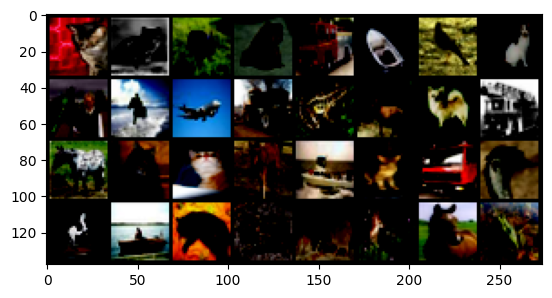

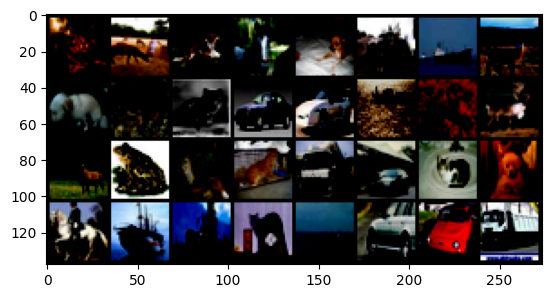

In [67]:
import random
import matplotlib.pyplot as plt
def batch_grid(train_loader):
  for _ in range (2):
    batch_index=random.randint(0,n_batchs-1)
    images,_ = next(iter(train_loader))
    grid = torchvision.utils.make_grid(images, nrow=8, padding=2)

    plt.imshow(grid.permute(1, 2, 0))
    plt.show()
batch_grid(random_dataloader)

In [68]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=5,padding=2,stride=1)
    self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=5,padding=2,stride=2)
    self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
    self.fc1=nn.Linear(64*8*8,256)
    self.fc2=nn.Linear(256,512)
    self.out=nn.Linear(512,10)
    self.drop_out=nn.Dropout(p=0.5)

  def forward(self,X):

    X=F.relu(self.conv1(X))


    X=F.relu(self.conv2(X))

    X=self.pool(X)

    X=X.view(X.size(0),-1)

    X=self.drop_out(X)
    X= F.relu(self.fc1(X))
    X= F.relu(self.fc2(X))
    X=self.out(X)
    return X


  #Output size= (Input size+2×padding−kernel size)/stride +1 internet

In [69]:
model=CNN()

In [70]:
num_epochs=6
class_s=10
learning_rate=0.001

In [71]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)

In [72]:
total_step = len(train_loader)   #total step

In [74]:
loss_list=[]
acc_list=[]
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    #forw
    outputs = model(images)
    loss=criterion(outputs,labels)
    loss_list.append(loss.item())



    #back
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #track acc
    total=labels.size(0)
    _,predicted= torch.max(outputs.data,1)
    correct=(predicted==labels).sum().item()
    # if total != 0:
    #   accuracy=correct/total
    #   acc_list.append(accuracy)
    # else:
    #    accuracy=0
    #    acc_list.append(accuracy)


    if (i+1)%100 ==0:
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))



Epoch [1/6], Step [100/1563], Loss: 1.6887, Accuracy: 31.25%
Epoch [1/6], Step [200/1563], Loss: 1.4803, Accuracy: 46.88%
Epoch [1/6], Step [300/1563], Loss: 1.5529, Accuracy: 34.38%
Epoch [1/6], Step [400/1563], Loss: 1.5233, Accuracy: 50.00%
Epoch [1/6], Step [500/1563], Loss: 1.9201, Accuracy: 37.50%
Epoch [1/6], Step [600/1563], Loss: 1.3133, Accuracy: 50.00%
Epoch [1/6], Step [700/1563], Loss: 1.4534, Accuracy: 53.12%
Epoch [1/6], Step [800/1563], Loss: 1.2145, Accuracy: 59.38%
Epoch [1/6], Step [900/1563], Loss: 1.6223, Accuracy: 50.00%
Epoch [1/6], Step [1000/1563], Loss: 1.5234, Accuracy: 43.75%
Epoch [1/6], Step [1100/1563], Loss: 1.1089, Accuracy: 59.38%
Epoch [1/6], Step [1200/1563], Loss: 1.4449, Accuracy: 53.12%
Epoch [1/6], Step [1300/1563], Loss: 1.1433, Accuracy: 62.50%
Epoch [1/6], Step [1400/1563], Loss: 1.5152, Accuracy: 40.62%
Epoch [1/6], Step [1500/1563], Loss: 0.6994, Accuracy: 84.38%
Epoch [2/6], Step [100/1563], Loss: 1.0865, Accuracy: 56.25%
Epoch [2/6], Step 

In [76]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy score: {} %'.format((correct / total) * 100))


Test Accuracy score: 71.45 %


In [77]:

torch.save(model.state_dict(), 'Image_Classification.pth')
